## Dataset Description:
### SL. No Attribute Description
1. Loan ID : Unique Loan ID
2. Gender  :Male or Female
3. Married :Applicant married (Y/N)
4. Dependents: Number of dependents
5. Self employed: Self employed (Y/N)
6. Education: Graduate/Undergraduate
7. Applicant Income: Applicant income (in dollars)
8. Co Applicant Income: Co Applicant Income (in dollars)
9. Loan Amount: Loan amount in thousands (in dollars)
10. Loan Amount: Term Term of loan in months
11. Credit History: Credit history meets guidelines Yes/No(1/0)
12. Property area: Urban/Semi Urban/Rural
13. Loan StatusL (Target) Loan Approved (Y/N)


##  Model Building and saving the model using Pickle

#### 1)  Import required libraries and read the dataset. (2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

import pickle


#### 2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [2]:
df = pd.read_csv('loan_approval_data.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
for feature in list(df):
    print("\n\n" + feature + ":-\n")
    print(df[feature].unique())



loan_id:-

['lp001002' 'lp001003' 'lp001005' 'lp001006' 'lp001008' 'lp001011'
 'lp001013' 'lp001014' 'lp001018' 'lp001020' 'lp001024' 'lp001027'
 'lp001028' 'lp001029' 'lp001030' 'lp001032' 'lp001034' 'lp001036'
 'lp001038' 'lp001041' 'lp001043' 'lp001046' 'lp001047' 'lp001050'
 'lp001052' 'lp001066' 'lp001068' 'lp001073' 'lp001086' 'lp001087'
 'lp001091' 'lp001095' 'lp001097' 'lp001098' 'lp001100' 'lp001106'
 'lp001109' 'lp001112' 'lp001114' 'lp001116' 'lp001119' 'lp001120'
 'lp001123' 'lp001131' 'lp001136' 'lp001137' 'lp001138' 'lp001144'
 'lp001146' 'lp001151' 'lp001155' 'lp001157' 'lp001164' 'lp001179'
 'lp001186' 'lp001194' 'lp001195' 'lp001197' 'lp001198' 'lp001199'
 'lp001205' 'lp001206' 'lp001207' 'lp001213' 'lp001222' 'lp001225'
 'lp001228' 'lp001233' 'lp001238' 'lp001241' 'lp001243' 'lp001245'
 'lp001248' 'lp001250' 'lp001253' 'lp001255' 'lp001256' 'lp001259'
 'lp001263' 'lp001264' 'lp001265' 'lp001266' 'lp001267' 'lp001273'
 'lp001275' 'lp001279' 'lp001280' 'lp001282' 'lp0

#### 3) Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [6]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [7]:
df.drop(['loan_id'], axis=1, inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()/len(df)*100

gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [11]:
df['total_income'] = df[['applicantincome','coapplicantincome']].sum(axis=1)

In [12]:
df.drop(['applicantincome', 'coapplicantincome'],axis=1, inplace=True)

#### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)


gender


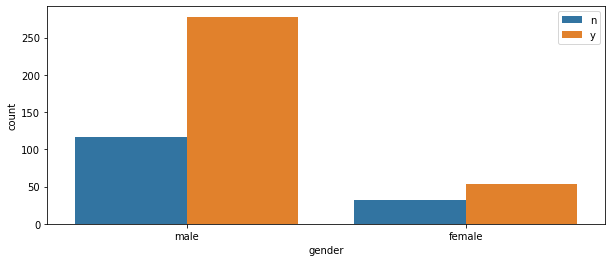

married


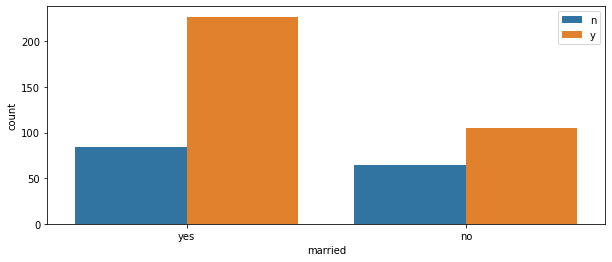

dependents


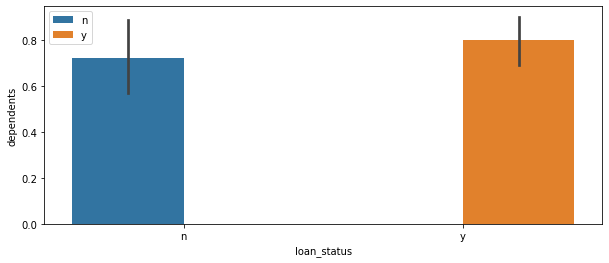

education


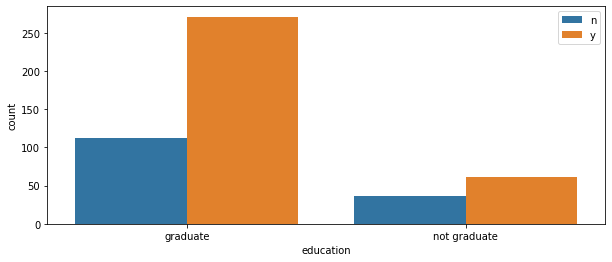

self_employed


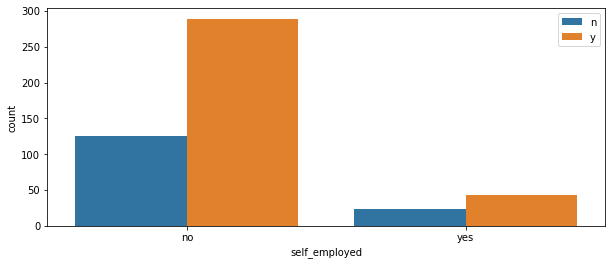

loanamount


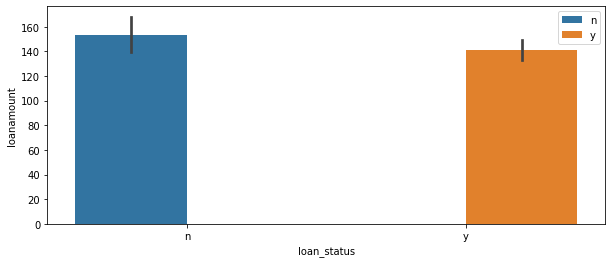

loan_amount_term


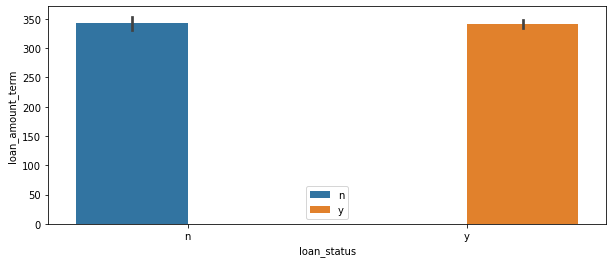

credit_history


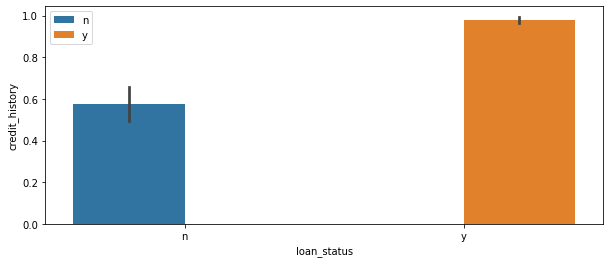

property_area


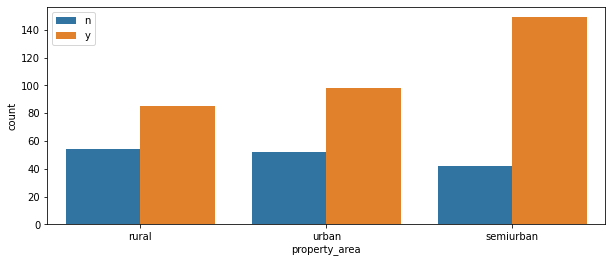

loan_status


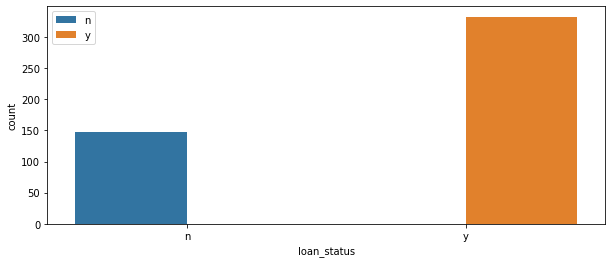

total_income


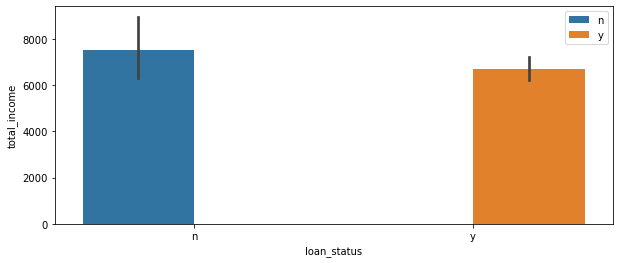

In [13]:
for features in list(df):
    print(features)
    if (df[features].dtype=='O'):
        plt.figure(figsize=(10,4))
        sns.countplot(df[features], hue = df.loan_status)
        plt.legend(loc = 'best')
        plt.show()
    else:
        plt.figure(figsize=(10,4))
        sns.barplot(df.loan_status,df[features], hue = df.loan_status)
        plt.legend(loc = 'best')
        plt.show()

#### Observations 
##### More Loans given to :-
- Employed 
- Married Graduate 
- Males
- Semi Urban
- More dependents
- High credit history.
- mean of loan is apprx 144

### 5 Encode the categorical data. (2)

In [14]:
df['gender']=np.where(df['gender']=='male',1,0).astype(int)
df['married']=np.where(df['married']=='yes',1,0).astype(int)
df['education']=np.where(df['education']=='graduate',1,0).astype(int)
df['self_employed']=np.where(df['self_employed']=='yes',0,1).astype(int)
df['property_area']=np.where(df['property_area']=='rural',0,np.where(df['property_area']=='semiurban',2,1)).astype(int)
df['loan_status']=np.where(df['loan_status']=='y',1,0).astype(int)
df.head()

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income
1,1,1,1.0,1,1,128.0,360.0,1.0,0,0,6091.0
2,1,1,0.0,1,0,66.0,360.0,1.0,1,1,3000.0
3,1,1,0.0,0,1,120.0,360.0,1.0,1,1,4941.0
4,1,0,0.0,1,1,141.0,360.0,1.0,1,1,6000.0
5,1,1,2.0,1,0,267.0,360.0,1.0,1,1,9613.0


### 6. Separate the target and independent features and split the data into train and test. (2)


In [15]:
x=df.drop('loan_status', axis=1)
y=df['loan_status']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=.30,random_state=100) 

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(336, 10) (144, 10)
(336,) (144,)


In [17]:
X_train.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'loanamount', 'loan_amount_term', 'credit_history', 'property_area',
       'total_income'],
      dtype='object')

### 7.Build any classification model to predict the loan status of the customer and save your model using pickle. (3)


In [18]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [19]:
pred_train =rf.predict(X_train)
pred_test = rf.predict(X_test)

In [20]:
r2_score(Y_train,pred_train)

1.0

In [21]:
r2_score(Y_test,pred_test)

-0.008403361344537785

In [22]:
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))